# Classification task using a perceptron

Create a dataset with three classes, each class has N objects, represented by two variables X1 and X2 according to the following requirements:

+ N is equal to 100
+ X1 is distributed:
    1. for class 1, a normal distribution with mean -1 and standard deviation 0.5
    2. for class 2, a normal distribution with mean 2.5 and standard deviation 1
    3. for class 3, a normal distribution with mean 4 and standard deviation 1
+ X2 is distributed:
    1. for class 1, an exponential distribution with scale parameter 3
    2. for class 2, a lognormal distribution with mean 0.5 and standard deviation 0.5
    3. for class 3, a Poisson distribution with lambda 2.0 plus a constant equal to 5

Each object has a label y attached (1, 2, or 3).

## Plot the points

In [68]:
import numpy as np;
import matplotlib.pyplot as plt; 

N=100

X1_1= np.random.normal(loc=-1,scale=0.5 ,size= N) 
X1_2= np.random.normal(loc=2.5,scale=1 ,size= N) 
X1_3= np.random.normal(loc=4,scale=1 ,size= N) 

X2_1 = np.random.exponential(scale=3 ,size= N) 
X2_2 = np.random.lognormal(mean=0.5,sigma=0.5 ,size= N) 
X2_3 = np.random.poisson(lam=2, size= N) + 5

y1 = np.ones(N)
y2 = np.ones(N)*2
y3 = np.ones(N)*3

## Create data matrix

Create a matrix of points X (each row is an object) and a vector y of labels. Remember that we need the coordinate X0 for the bias term (all ones).

In [69]:
#creo le data matrix 
X0 = np.ones(N*3)
X = np.stack([
    X0,
    np.concatenate([X1_1,X1_2,X1_3]),
    np.concatenate([X2_1,X2_2,X2_3])
],axis=1)

Y= np.concatenate([y1,y2,y3])

## Choose category 

We want to train a binary classifier for class 3. To this purpose, create a vector of labels y_class that contains 1 for each object belonging to the class under study (positive class) and -1 to all the other objects.


In [70]:
positive_class=3
y_class = -np.ones(N*3)

y_class[Y==positive_class]=1

### Plot this binary problem

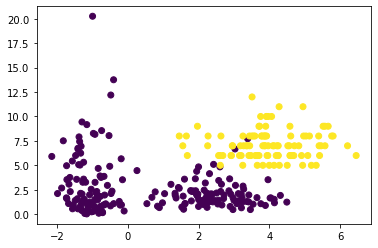

In [71]:
plt.scatter(X[:,1],X[:,2],c=y_class)

## Define the Sum of squares error function

Write the function sse(X, y, w) that takes the data matrix X, the labels y, and the vector of paraterers w and computes the error in terms of sum of squares.

In [72]:
def sse(X,y,w):
    error =np.sum(np.square(y-np.dot(X,w)))/2
    return error 


## Train the perceptron with a mini-batch stochastic gradient descent

Set the values of the vector of parameters w with values drawn from a uniform distribution within the range \[-1. 1\].
Use a learning parameter eta equal to 1e-5 and a batch size of 10 objects. Set the maximum number of epochs to 100.
Save in the vector sse_epoch, the values of the sum of squares error for each epoch. Save in the vector errors_epoch, the number of objects misclassified at each epoch.
Remember to shuffle the dataset at each epoch.

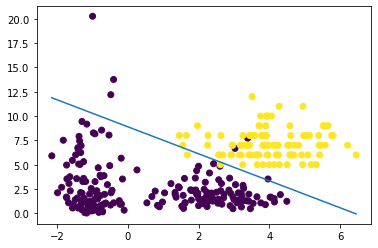

In [73]:
batch_size= 10
eta = 10e-5
max_epoch=500
plt.scatter(X[:,1],X[:,2],c=y_class)
w=np.random.uniform(low=-1,high=1, size=3)

for epoch in range(max_epoch):
    perm =np.random.permutation(range(y_class.shape[0]))

    X=X[perm,:]
    y_class=y_class[perm]


    for j in range(0,Y.shape[0],batch_size):

        X_batch= X[j:(j+batch_size)]
        y_batch= y_class[j:(j+batch_size)]

        error = y_batch - np.dot(X_batch,w)
        w = w + eta* np.dot(X_batch.T,error)


plt.plot([np.min(X[:,1]),np.max(X[:,1])],[np.min(X[:,1])*(-w[1]/w[2])-(w[0]/w[2]),np.max(X[:,1])*(-w[1]/w[2])-(w[0]/w[2])])

## Plot number of errors per epoch

# Polynomial regression task

In this exercies, we will reuse the coordinate X1 to create a regression problem. The output Y (the "oracle" target function) is a cubic function aX^3 + bX^2 + cX + d with values a = -1, b = 2, c = -3, d = 4. Moreover, we sum some randome noise with a gaussian distribution (mean zero, standard deviation 2.5).

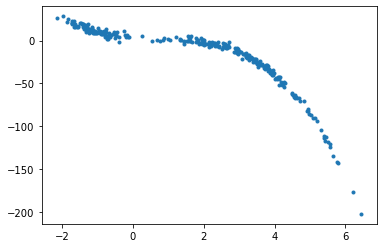

In [74]:
a = -1 
b = 2,
c = -3
d = 4

disturbo = np.random.normal(loc=0, scale=2.5, size= N*3)
#mi creo X1
X1 = np.concatenate([X1_1,X1_2,X1_3])
#oracle function
Y = a*X1**3 + b*X1**2 + c*X1 +d+ disturbo
Y_C= Y
plt.plot(X1, Y,'.')

## Create data matrix
Suppose that your hypohtesis is a quadratic function, generate the data matrix accordingly (remember the X0) and save it into the variable X_reg.

In [75]:
X0 = np.ones(N*3)
X_reg = np.stack([X0,X1,X1**2],axis=1)

## Find the optimal vector of parameters
In this case, we will try to find the optimal w using the closed form.

In [76]:


w= np.random.uniform(low= -1, high=1, size=3)

#parametri 
mini_batch_size=10
eta = 1e-4
max_epoch = 10000

total_error=np.zeros(max_epoch+1)
errors_epoch = np.zeros(max_epoch+1)

def error_w (X,y,w):
    error = np.sum(np.square(y-np.dot(X,w))) / 2.0
    return error

for epoch in range(max_epoch):

    perm = np.random.permutation(range(N*3))
    X_reg= X_reg[perm,:]
    Y = Y[perm]
    errors_epoch= erro
    total_error[epoch]=np.sum(y*np.sign(np.dot(X_reg,w)) <0)
    for j in range(0,N*3,mini_batch_size):
        X_batch = X_reg[j:(j+mini_batch_size),:]
        y_batch = Y[j:(j+mini_batch_size)]
        errore = y_batch - np.dot(X_batch,w)
        w = w + eta*(np.dot(np.transpose(X_batch),errore))



## Check the curvature of the solution

Why does this solution look like a line? Try to plot the parabola and think about the reasons of this shape.

[18.07899872  0.3379639  -4.18183902]


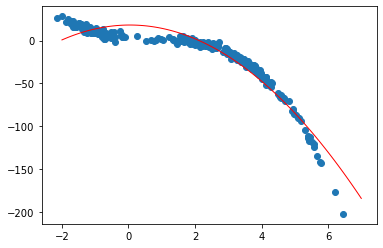

In [77]:
# genero dei punti per plottare la linea
x_grid = np.linspace(-2, 7, 100) 

# plot line
plt.scatter(X1,Y_C)

plt.plot(x_grid, w[0] + x_grid * w[1] + x_grid**2 * w[2],c='r', linewidth=1)

print(w)

[[  1.          -1.01549321   1.03122647  -1.04720348]
 [  1.          -0.97654103   0.95363238  -0.93126114]
 [  1.          -1.36446302   1.86175932  -2.54030174]
 ...
 [  1.           5.51585146  30.42461737 167.81767024]
 [  1.           1.45054685   2.10408617   3.05207556]
 [  1.           5.45925057  29.80341676 162.70431987]]
[-0.2456891   0.65474502 -0.03252024 -0.26523829]
[-22.15790454  -6.00358893 -39.79713125  -0.56978093  -0.66297977
 -40.79590108  -3.26298439  -6.57740457  -1.91401869 -10.17760163] PRODOTTO
[ -62.93593527  -13.759172   -117.42509915   14.25028499    8.59449512
 -112.31895105   -6.7116336   -15.90959301   -2.59163695  -24.83943615]
[-40.77803073  -7.75558307 -77.6279679   14.82006592   9.25747489
 -71.52304997  -3.44864921  -9.33218844  -0.67761826 -14.66183452]
[ -0.44741648  -0.48195495  -5.60935236 -29.21744359]
[-2968.06827954  -315.9978936  -1082.15136193 -1766.2680835
 -3872.08165329  -134.91176178  -726.81381114  -571.53270801
 -4094.91956511  -396

/var/folders/p7/spkm18x575v6mlwyqx6xlyb40000gp/T/ipykernel_890/2330021446.py:36: RuntimeWarning: invalid value encountered in add
  wc = wc + eta* (np.dot(X_batch.T,errore))


[nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan] PRODOTTO
[-54.3250708   -4.07490365   7.97462166  14.35456749 -20.94840777
  12.44658369   9.9567121   26.55071784  -3.77398806 -52.18215859]
[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan] PRODOTTO
[   6.00250305   12.07349467  -27.08796225  -15.21387113    7.97369274
   -5.9747165   -18.14244171 -119.0700001   -22.27798561   -5.73542395]
[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan] PRODOTTO
[ 1.90946126e+01  8.82377363e+00 -2.59163695e+00  7.25587996e-02
 -3.36232386e+01 -6.60270548e+01 -6.76538633e+01  6.04088729e+00
 -9.06842937e+01  5.16297955e+00]
[nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan] PRODOTTO
[ 20.08549811 -65.5525591  -32.50451869 -35.19178819 -48.72290898
  12.91967305   0.42544737   3.3846702   19.76643602 -13.00740901]
[nan nan nan nan nan nan 

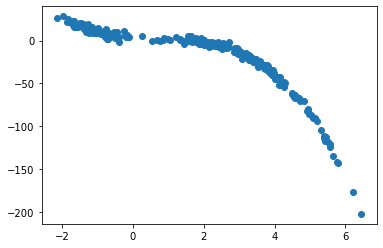